# Capstone Project
### DATA 606, Spring 2022, Dr. Chaojie Wang
### David Fahnestock

#### Description: 
This notebook represents additional Exploratory Data Analysis on Unemployment rate data and on weather Data to identify potential additional features that could be useful in machine learning. 

#### Dataset Sources:
<ul><li><b>Unemployment Data for Illinois, New York, and California.</b>  This is actual historic monthly unemployment rates for the three states related to our analysis. <br />
    Source: U.S. Bureau Labor Statistics (Source Data: Bureau Labor Statistics (https://www.bls.gov)</li>
    <li><b>Historic daily actual weather conditions for Chicago, NYC, and San Francisco.</b> <br />
    Source: National Oceanic and Atmospheric Administration (NOAA: https://www.noaa.gov/)
</ul>

## Function Definitions & Setup
This section deals with imports and function definitions

In [29]:
import pandas as pd
pd.__version__

'1.3.4'

In [30]:
from matplotlib import pyplot as plt

In [31]:
import numpy as np

In [32]:
import os
from os.path import join, isdir
from os import mkdir, path

In [33]:
import datetime

In [34]:
# Import my helper py file to help with importing the data
import dfimporthelpers as imp

<br><br>
## Review and Clean the BLS Unemployment data

In [35]:
# Read California data
df_UE_CA = pd.read_csv('data/BLSUnemploymentData/BLSUnemploymentRates_CA.txt', sep='\t', low_memory=False)

# Add State Column
df_UE_CA['state'] = 'CA'

In [36]:
# Read Illinois data
df_UE_IL = pd.read_csv('data/BLSUnemploymentData/BLSUnemploymentRates_IL.txt', sep='\t', low_memory=False)

# Add State Column
df_UE_IL['state'] = ' IL'

In [37]:
# Read NY data
df_UE_NY = pd.read_csv('data/BLSUnemploymentData/BLSUnemploymentRates_NY.txt', sep='\t', low_memory=False)

# Add State Column
df_UE_NY['state'] = ' NY'

#### Combine the three state dataframes into one

In [38]:
df_UE = pd.concat([df_UE_CA, df_UE_IL, df_UE_NY])

In [39]:
df_UE.head()

,series_id,year,period,value,footnote_codes,state
0,LASBS060000000000003,1976,M01,9.4,NaN,CA
1,LASBS060000000000003,1976,M02,9.4,NaN,CA
2,LASBS060000000000003,1976,M03,9.3,NaN,CA
3,LASBS060000000000003,1976,M04,9.2,NaN,CA
4,LASBS060000000000003,1976,M05,9.1,NaN,CA


In [40]:
# Rename columns to change "value" to "ue_rate"
df_UE.columns = ['series_id','year','period','ue_rate','footnote_codes','state']

#### Remove rows that don't represent unemployment rates (unemployment rates for states start with "LASST" and end with "03" at the end of the "series_id" field)

Reference:<br> Measure Codes: <a href='https://download.bls.gov/pub/time.series/la/la.measure'>https://download.bls.gov/pub/time.series/la/la.measure</a>
<br>Series_id structure: <a href='https://download.bls.gov/pub/time.series/la/la.txt'>https://download.bls.gov/pub/time.series/la/la.txt</a>

In [41]:
df_UE = df_UE[(df_UE['series_id'].str[18:20] == '03') & \
              (df_UE['series_id'].str[:5] == 'LASST')].copy()

In [42]:
df_UE.shape

(1665, 6)

#### Filter for only the time period for analysis

In [43]:
df_UE = df_UE.loc[(df_UE['year'] >= 2019) & (df_UE['year'] <= 2021)].copy()

In [44]:
df_UE.head()

,series_id,year,period,ue_rate,footnote_codes,state
6066,LASST060000000000003,2019,M01,4.3,R,CA
6067,LASST060000000000003,2019,M02,4.2,R,CA
6068,LASST060000000000003,2019,M03,4.2,R,CA
6069,LASST060000000000003,2019,M04,4.1,R,CA
6070,LASST060000000000003,2019,M05,4.1,R,CA


#### Add Month column then remove unneeded columns

In [45]:
df_UE['year-month'] = df_UE['year'].map(str) + '-' + df_UE['period'].str[-2:]

In [46]:
df_UE.head()

,series_id,year,period,ue_rate,footnote_codes,state,year-month
6066,LASST060000000000003,2019,M01,4.3,R,CA,2019-01
6067,LASST060000000000003,2019,M02,4.2,R,CA,2019-02
6068,LASST060000000000003,2019,M03,4.2,R,CA,2019-03
6069,LASST060000000000003,2019,M04,4.1,R,CA,2019-04
6070,LASST060000000000003,2019,M05,4.1,R,CA,2019-05


In [47]:
df_UE.dtypes

series_id          object
year                int64
period             object
ue_rate           float64
footnote_codes     object
state              object
year-month         object
dtype: object

In [48]:
# Select only the columns we need
df_UE = df_UE[['year','ue_rate','state','year-month']]

In [49]:
df_UE.head()

,year,ue_rate,state,year-month
6066,2019,4.3,CA,2019-01
6067,2019,4.2,CA,2019-02
6068,2019,4.2,CA,2019-03
6069,2019,4.1,CA,2019-04
6070,2019,4.1,CA,2019-05


In [50]:
# Pivot to prepare to plot the years and cities
df_pivot = df_UE.pivot(index='year-month', columns='state', values='ue_rate')

In [51]:
df_pivot.head()

state,IL,NY,CA
year-month,,,
2019-01,4.5,3.9,4.3
2019-02,4.5,3.9,4.2
2019-03,4.3,3.8,4.2
2019-04,4.1,3.7,4.1
2019-05,4.0,3.7,4.1


<Figure size 432x288 with 0 Axes>

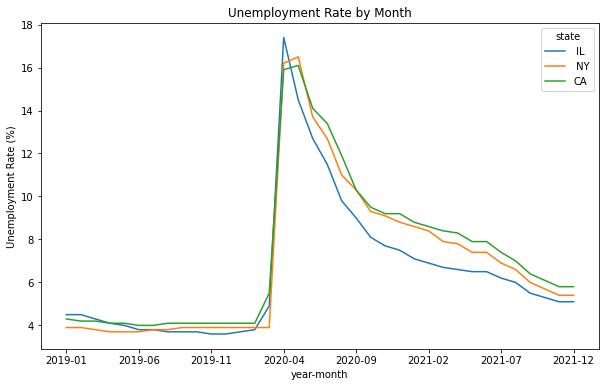

In [52]:
heading = 'Unemployment Rate by Month'

plt.figure()
ax = df_pivot.plot.line(stacked=False, figsize=(10,6), title=heading)
ax.set_ylabel('Unemployment Rate (%)')
    
# Display to screen
plt.show()

### Conclusion on Unemployment Data

Based on the above and in relation to the micromobility data as illustrated in PowerPoint, the sharp spike in unemployment when the pandemic shutdowns began significantly skews the information.  Also, the spike does not seem to impact micromobility usage.  Therefore, the unemployment data will not be used for machine learning.

<br><br>
## Review and Clean the NOAA Weather Data

In [81]:
df = pd.read_csv('data/NOAA_WeatherActuals_Chicago_NYC_SF.csv', low_memory=False)

In [82]:
df.head()

,STATION,NAME,DATE,AWND,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,WSF5,city
0,USW00023234,"SAN FRANCISCO INTERNATIONAL AIRPORT, CA US",1/1/17,15.43,0.05,NaN,NaN,51,54.0,46.0,35.1,San Francisco
1,USW00023234,"SAN FRANCISCO INTERNATIONAL AIRPORT, CA US",1/2/17,7.38,0.18,NaN,NaN,47,52.0,44.0,19.9,San Francisco
2,USW00023234,"SAN FRANCISCO INTERNATIONAL AIRPORT, CA US",1/3/17,16.33,0.64,NaN,NaN,50,59.0,48.0,53.9,San Francisco
3,USW00023234,"SAN FRANCISCO INTERNATIONAL AIRPORT, CA US",1/4/17,10.74,0.49,NaN,NaN,56,59.0,47.0,40.9,San Francisco
4,USW00023234,"SAN FRANCISCO INTERNATIONAL AIRPORT, CA US",1/5/17,8.50,0.00,NaN,NaN,48,51.0,41.0,21.9,San Francisco


In [83]:
df.dtypes

STATION     object
NAME        object
DATE        object
AWND       float64
PRCP       float64
SNOW       float64
SNWD       float64
TAVG         int64
TMAX       float64
TMIN       float64
WSF5       float64
city        object
dtype: object

In [84]:
# Convert date
df['DATE'] = pd.to_datetime(df['DATE'])

In [85]:
# Add month
df['year-month'] = df['DATE'].dt.strftime('%Y-%m')

In [86]:
df.isnull().sum()

STATION          0
NAME             0
DATE             0
AWND             0
PRCP             0
SNOW          1826
SNWD          1826
TAVG             0
TMAX            20
TMIN            20
WSF5            26
city             0
year-month       0
dtype: int64

In [87]:
# fill nulls with 0
df = df.fillna(0)

<br />

### First plot high temperatures

In [97]:
# Group the results by month
df_grouped = df.groupby(['year-month', 'city']).agg({'TMAX': 'mean'}).copy().reset_index()

In [98]:
# Pivot to plot high temperature
df_pivot = df_grouped.pivot(index='year-month', columns='city', values='TMAX')

In [99]:
df_pivot.head()

city,Chicago,NYC,San Francisco
year-month,,,
2017-01,34.580645,43.870968,56.451613
2017-02,47.678571,47.785714,59.785714
2017-03,47.129032,46.935484,64.096774
2017-04,63.766667,62.700000,66.166667
2017-05,67.709677,67.419355,69.806452


<Figure size 432x288 with 0 Axes>

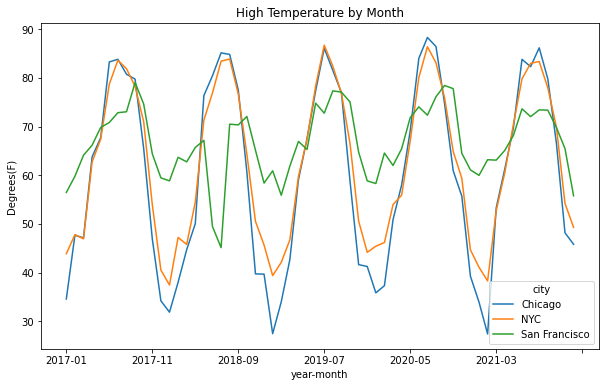

In [100]:
heading = 'High Temperature by Month'

plt.figure()
ax = df_pivot.plot.line(stacked=False, figsize=(10,6), title=heading)
ax.set_ylabel('Degrees')
    
# Display to screen
plt.show()

<br />

### Now plot precipitation

In [101]:
# Group the results by month
df_grouped = df.groupby(['year-month', 'city']).agg({'PRCP': 'sum'}).copy().reset_index()

In [102]:
# Pivot to plot high temperature
df_pivot = df_grouped.pivot(index='year-month', columns='city', values='PRCP')

In [103]:
df_pivot.head()

city,Chicago,NYC,San Francisco
year-month,,,
2017-01,2.87,4.64,9.33
2017-02,1.52,1.58,7.43
2017-03,4.01,5.79,2.96
2017-04,6.43,4.06,2.20
2017-05,3.28,5.83,0.00


<Figure size 432x288 with 0 Axes>

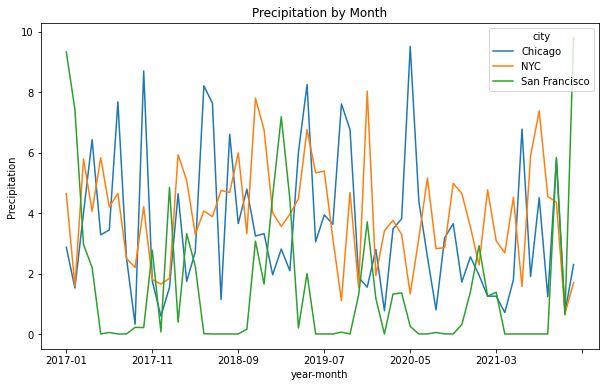

In [104]:
heading = 'Precipitation by Month'

plt.figure()
ax = df_pivot.plot.line(stacked=False, figsize=(10,6), title=heading)
ax.set_ylabel('Precipitation')
    
# Display to screen
plt.show()

<br />

### Now plot snow accumulation

In [105]:
# Group the results by month
df_grouped = df.groupby(['year-month', 'city']).agg({'SNWD': 'sum'}).copy().reset_index()

In [106]:
# Pivot to plot high temperature
df_pivot = df_grouped.pivot(index='year-month', columns='city', values='SNWD')

In [107]:
df_pivot.head()

city,Chicago,NYC,San Francisco
year-month,,,
2017-01,0.0,26.5,0.0
2017-02,0.0,29.1,0.0
2017-03,11.1,21.2,0.0
2017-04,0.0,0.0,0.0
2017-05,0.0,0.0,0.0


<Figure size 432x288 with 0 Axes>

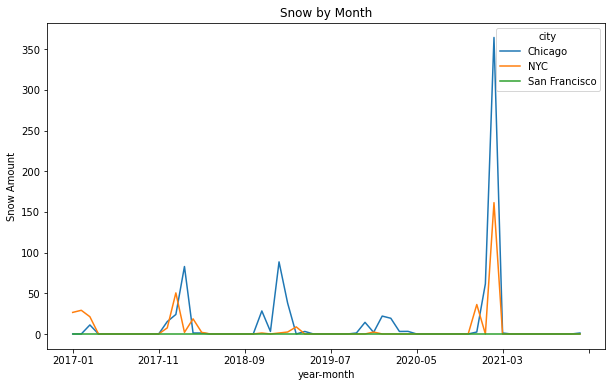

In [108]:
heading = 'Snow by Month'

plt.figure()
ax = df_pivot.plot.line(stacked=False, figsize=(10,6), title=heading)
ax.set_ylabel('Snow Amount')
    
# Display to screen
plt.show()